In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
def generar_muestra(n=10):
    # Generar n puntos x aleatorios en el intervalo [0,1]
    x = np.random.uniform(0, 1, n)
    
    # Inicializar el arreglo de etiquetas y
    y = np.empty(n, dtype='object')
    
    # Asignar etiquetas según la probabilidad condicional p(y=azul|x)
    for i in range(n):
        # p(y=azul|x) = x
        y[i] = 'blue' if np.random.rand() < x[i] else 'red'
        
    return x, y

In [21]:
# Define los intervalos de theta
thetas = np.linspace(0, 1, 300)

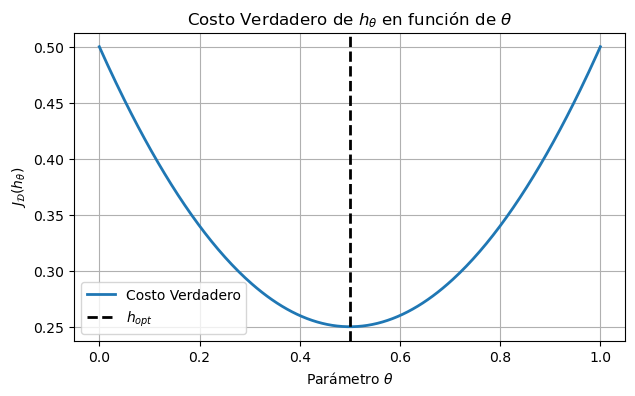

In [22]:

# Calcula el costo para cada theta
costos = []
for theta in thetas:
    costos.append(0.5*theta**2+0.5*(1-theta)**2)

# Graficar el costo verdadero de h_theta en función de theta
plt.figure(figsize=(4*(16/9), 4))
plt.plot(thetas, costos, label="Costo Verdadero", linewidth=2)
plt.axvline(x=0.5,color='black', linewidth=2, linestyle='dashed', label=r'$h_{opt}$')

plt.xlabel(r'Parámetro $\theta$')
plt.ylabel(r'$J_{\mathcal{D}}(h_{\theta})$')
plt.legend()
plt.title(r'Costo Verdadero de $h_{\theta}$ en función de $\theta$')
plt.grid(True)
plt.show()


In [23]:
def h(x, theta):
    y_hat = 'blue' if x>theta else 'red'
    return y_hat

In [33]:
# Generar una muestra de puntos
x, y = generar_muestra(50)

In [34]:
# Imprimir los primeros 10 para verificar
for i in range(10):
    print(f"x: {x[i]:.2f}, y: {y[i]}")

x: 0.50, y: blue
x: 0.23, y: red
x: 0.94, y: blue
x: 0.50, y: red
x: 0.99, y: blue
x: 0.59, y: red
x: 0.05, y: red
x: 0.19, y: red
x: 0.98, y: blue
x: 0.40, y: red


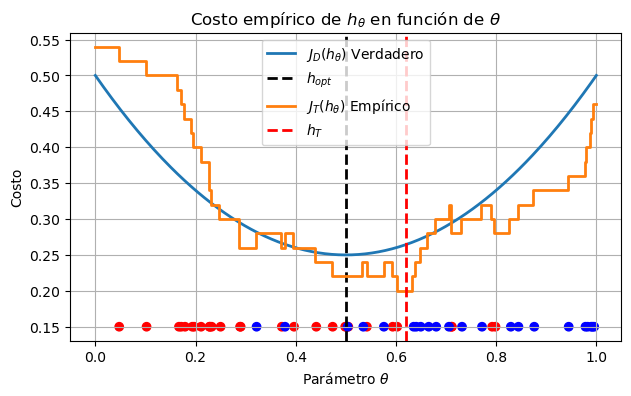

In [40]:
N = len(x)
perdidas = []

for theta in thetas:
    J = 0
    for i in range(N):
        y_hat = h(x[i],theta)
        L = 0 if y_hat == y[i] else 1
        J = J + L/N
    perdidas.append(J)

plt.figure(figsize=(4*(16/9), 4))
plt.plot(thetas, costos, label=r'$J_D(h_\theta)$ Verdadero', linewidth=2)
plt.axvline(x=0.5,color='black', linewidth=2, linestyle='dashed', label=r'$h_{opt}$')

plt.step(thetas, perdidas, label=r'$J_T(h_\theta)$ Empírico', linewidth=2)
plt.axvline(x=0.62,color='red', linewidth=2, linestyle='dashed', label=r'$h_T$')

plt.scatter(x,[0.15]*N, color = y)
plt.xlabel(r'Parámetro $\theta$')
plt.ylabel(r'Costo')
plt.legend()
plt.title(r'Costo empírico de $h_{\theta}$ en función de $\theta$')
plt.grid(True)
plt.show()